# SGD Classifier
## chargement des données 
On charge nos données déja nettoyées

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

cleaned_data = pd.read_csv("datas/cleanedData.csv")
labels = pd.read_csv("datas/labels.csv")
cleaned_data.drop("Attrition", axis=1, inplace=True)
cleaned_data.insert(1,"Attrition", labels["Attrition"])
cleaned_data

,EmployeeID,Attrition,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,BusinessTravel,DistanceFromHome,Education,JobLevel,MonthlyIncome,...,Department_Sales,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,-1.738009,0,0.252403,1.157359,-1.075518,-0.161282,-0.394993,-0.891282,-0.964277,1.405193,...,1.513267,3.225808,-0.192728,-0.462235,-0.27337,-0.329877,-0.240438,-0.499637,-0.534682,-0.243668
1,-1.737223,1,0.252403,-0.657940,1.750469,1.718161,0.099071,-1.867220,-0.964277,-0.492557,...,-0.660822,-0.310000,-0.192728,-0.462235,-0.27337,-0.329877,-0.240438,2.001455,-0.534682,-0.243668
2,-1.736437,0,-0.661946,-0.657940,-2.488512,1.718161,0.963683,1.060595,1.746964,2.725773,...,-0.660822,-0.310000,-0.192728,-0.462235,-0.27337,-0.329877,-0.240438,-0.499637,1.870269,-0.243668
3,-1.735651,0,1.166752,1.157359,0.337475,-2.040726,-0.889057,2.036534,0.843217,0.385846,...,-0.660822,-0.310000,5.188649,-0.462235,-0.27337,-0.329877,-0.240438,-0.499637,-0.534682,-0.243668
4,-1.734864,0,1.166752,-1.565590,0.337475,-0.161282,0.099071,-1.867220,-0.964277,-0.885202,...,-0.660822,-0.310000,-0.192728,-0.462235,-0.27337,-0.329877,-0.240438,-0.499637,1.870269,-0.243668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,1.724337,0,0.252403,1.157359,0.337475,-0.161282,-0.642025,0.084657,-0.060530,-0.630737,...,1.513267,-0.310000,5.188649,-0.462235,-0.27337,-0.329877,-0.240438,-0.499637,-0.534682,-0.243668
4296,1.725123,0,1.166752,-1.565590,0.337475,-0.161282,-0.518509,1.060595,-0.964277,-0.101400,...,-0.660822,-0.310000,-0.192728,-0.462235,-0.27337,-0.329877,-0.240438,2.001455,-0.534682,-0.243668
4297,1.725910,0,1.166752,1.157359,0.337475,-0.161282,-0.889057,1.060595,-0.964277,-0.813561,...,-0.660822,-0.310000,-0.192728,2.163404,-0.27337,-0.329877,-0.240438,-0.499637,-0.534682,-0.243668
4298,1.726696,0,-1.576295,0.249709,0.337475,-0.161282,1.951811,-0.891282,-0.060530,-0.596086,...,-0.660822,-0.310000,-0.192728,-0.462235,-0.27337,-0.329877,-0.240438,-0.499637,1.870269,-0.243668


## Creation du jeu de test et d'entrainement

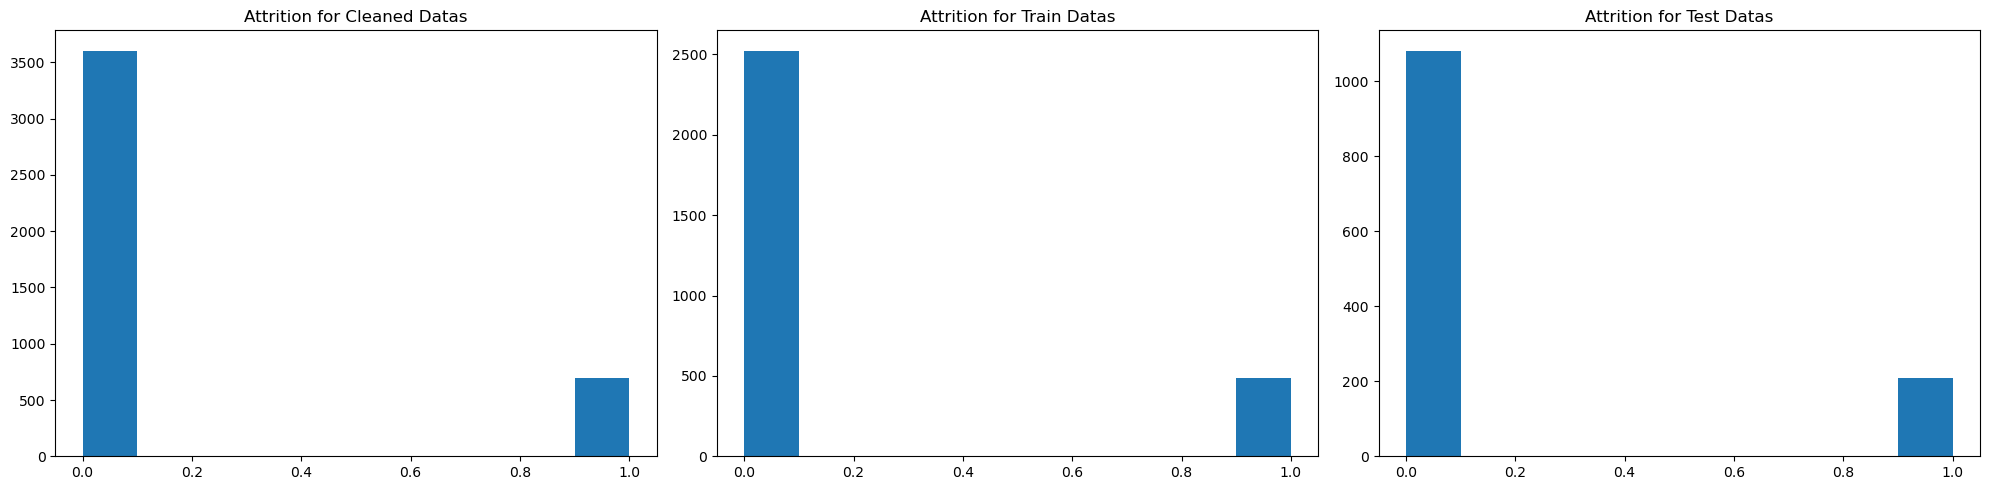

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

axes[0].hist(cleaned_data["Attrition"])
axes[0].set_title('Attrition for Cleaned Datas')

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(cleaned_data, cleaned_data["Attrition"]):
    strat_train_set = cleaned_data.loc[train_index]
    strat_test_set = cleaned_data.loc[test_index]

axes[1].hist(strat_train_set["Attrition"])
axes[1].set_title('Attrition for Train Datas')

axes[2].hist(strat_test_set["Attrition"])
axes[2].set_title('Attrition for Test Datas')

plt.tight_layout()
plt.show()

## Test and train creation ##

In [4]:

x_train_set = strat_train_set.drop("Attrition",axis = 1)
y_train_set = strat_train_set["Attrition"].copy()

x_test_set = strat_test_set.drop("Attrition",axis = 1)
y_test_set = strat_test_set["Attrition"].copy()

In [9]:
y_train_set

1936    0
4025    0
131     0
1476    0
1014    0
       ..
721     0
2790    0
33      1
3714    0
199     0
Name: Attrition, Length: 3010, dtype: int64

## Creation of fonction for testing ##

In [72]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_predict
from scipy.stats import randint, uniform
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score, RocCurveDisplay, roc_curve, precision_score, recall_score
from sklearn import tree, metrics


def Fit_Model(model):
    model.fit(x_train_set, y_train_set)
    return model

def Rnd_Search(param_distribs, classifier):
    rnd_search = RandomizedSearchCV(classifier,
                                    param_distributions=param_distribs,
                                    n_iter=100,
                                    cv=5,
                                    scoring='f1',
                                    random_state=42)

    rnd_search.fit(x_train_set, y_train_set)
    return rnd_search

def Grid_Search(param_grid, classifier):
    grid_search = GridSearchCV(classifier,
                               param_grid,
                               scoring='f1',
                               return_train_score=True)
    grid_search.fit(x_train_set, y_train_set)
    return grid_search

def Get_Accuracy_Score(model):
    predictions = model.predict(x_test_set)
    return accuracy_score(y_test_set, predictions)

def Get_Precision_Score(model):
    predictions = model.predict(x_test_set)
    return precision_score(y_test_set, predictions)

def Get_Recall_Score(model):
    predictions = model.predict(x_test_set)
    return recall_score(y_test_set, predictions)


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

def Get_ROC_Curve(model, name, pred, comp):
    
    fpr_svc, tpr_svc, thresholds_svc = roc_curve(comp,pred)
    plt.figure(figsize=(8, 6))
    plot_roc_curve(fpr_svc, tpr_svc, "SVC")
    plt.legend(loc="lower right", fontsize=16)
    plt.show()


def Get_Confusion_Matrix(model, name, pred, comp):
    
    ConfusionMatrixDisplay.from_predictions(comp, pred)
    plt.title(name +' - Confusion Matrix', fontsize=12)
    plt.show()

def get_dt_graph(model):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(model,
                       feature_names = x_test_set.columns,
                       class_names=['Left', "Stay"],
                       filled=True)

def Get_Model_Indicators(model, name, pred, comp):
    model.fit(x_train_set, y_train_set)
    print (f"accuracy : {accuracy_score(comp, pred)}")
    print (f"precision : {precision_score(comp, pred)}")
    print (f"recall : {recall_score(comp, pred)}")
    print (f"f1_score : {f1_score(comp, pred)}")
    print (f"auc score : {roc_auc_score(comp, pred)}")
    Get_Confusion_Matrix(model, name, pred, comp)
    Get_ROC_Curve(model, name, pred, comp)


## Standard Vector Classification ##

accuracy : 0.9425249169435216
precision : 0.9905956112852664
recall : 0.6502057613168725
f1_score : 0.7850931677018634
auc score : 0.8245085858882302


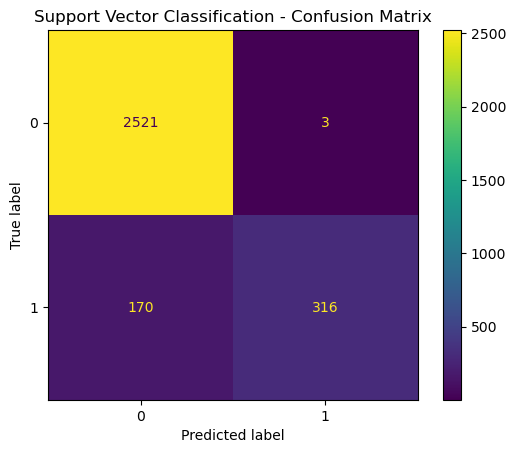

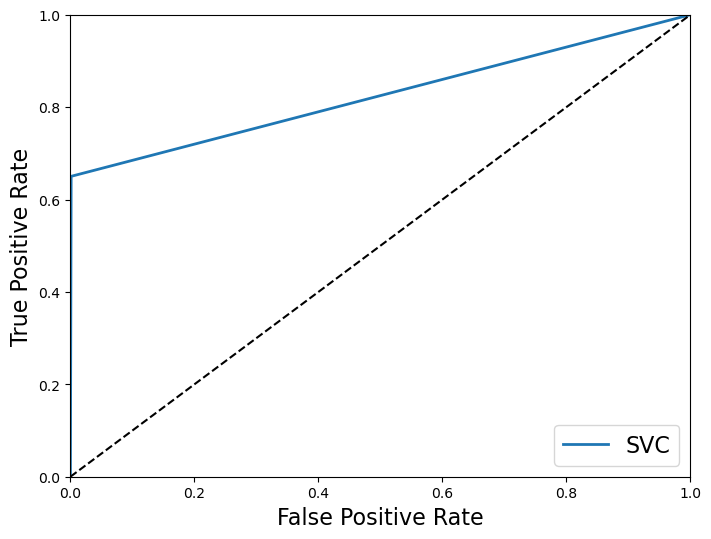

In [73]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train_set, y_train_set)
train_svc_predict = svc.predict(x_train_set)
Get_Model_Indicators(svc, "Support Vector Classification", train_svc_predict, y_train_set)

accuracy : 0.8913621262458472
precision : 0.9392265193370166
recall : 0.3497942386831276
f1_score : 0.5097451274362819
auc score : 0.672718038517475


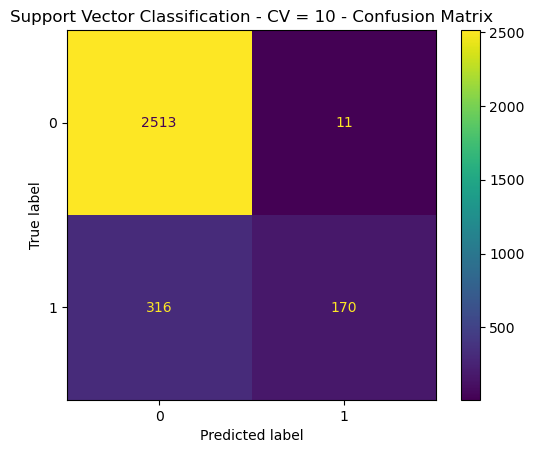

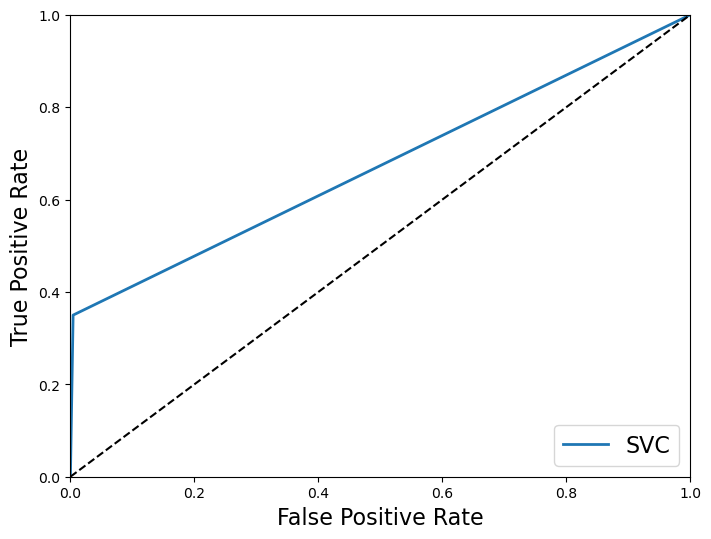

In [74]:
train_svc_predict_cv = cross_val_predict(svc, x_train_set, y_train_set, cv=10)
Get_Model_Indicators(svc, "Support Vector Classification - CV = 10", train_svc_predict_cv, y_train_set)

accuracy : 0.9007751937984496
precision : 1.0
recall : 0.3875598086124402
f1_score : 0.5586206896551725
auc score : 0.69377990430622


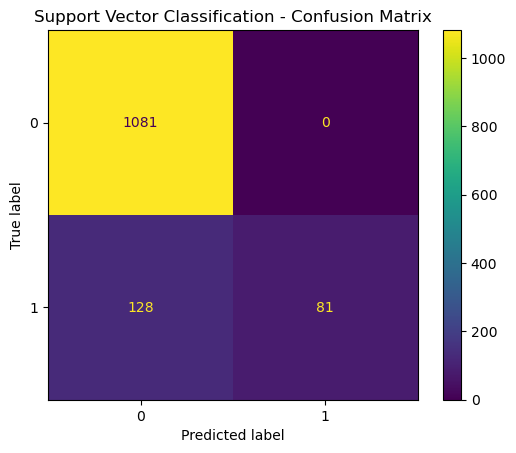

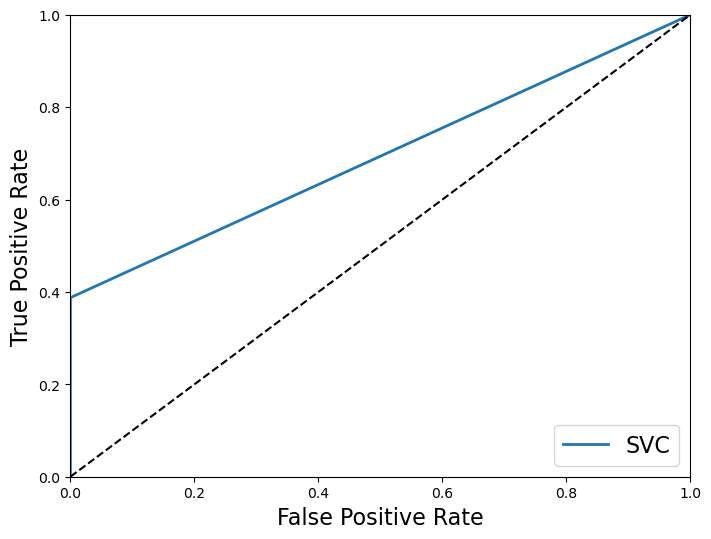

In [75]:
test_svc_predict = svc.predict(x_test_set)
Get_Model_Indicators(svc, "Support Vector Classification", test_svc_predict, y_test_set)